In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


{'whiskers': [<matplotlib.lines.Line2D at 0x23b004ad210>,
 'caps': [<matplotlib.lines.Line2D at 0x23b004ad750>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b004acf70>],
 'medians': [<matplotlib.lines.Line2D at 0x23b004adc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b004adf30>],
 'means': []}

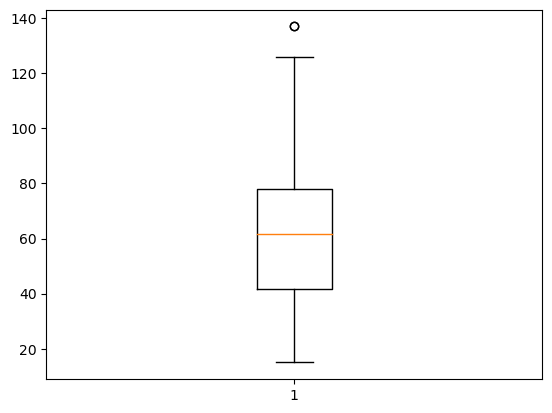

In [3]:
plt.boxplot(df['Annual Income (k$)'])

In [4]:
q1 = df['Annual Income (k$)'].quantile(0.25) 
q3 = df['Annual Income (k$)'].quantile(0.75) 

In [5]:
IQR = q3-q1
IQR

36.5

In [6]:
upper_limit = q3+1.5*IQR
upper_limit

132.75

In [7]:
lower_limit =q1-1.5*IQR
lower_limit

-13.25

In [8]:
df.median()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10748\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [9]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])

<Axes: >

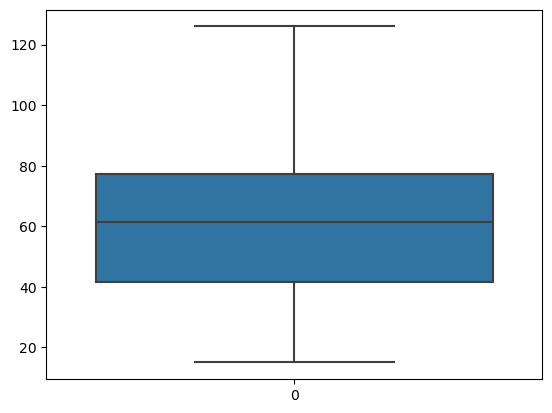

In [10]:
sns.boxplot(df['Annual Income (k$)'])

## Here We Will Check what kind of Data Types We have So we can transform them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


## Check for Null Value and If there Remove it

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,59.805000,50.200000
std,57.879185,13.969007,25.110699,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.250000,50.000000
75%,150.250000,49.000000,77.250000,73.000000
max,200.000000,70.000000,126.000000,99.000000


## So Here We have to change the Gender form Object to int or float

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df.Gender=le.fit_transform(df.Gender)

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [17]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,59.805000,50.200000
std,57.879185,0.497633,13.969007,25.110699,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.250000,50.000000
75%,150.250000,1.000000,49.000000,77.250000,73.000000
max,200.000000,1.000000,70.000000,126.000000,99.000000


In [18]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.970787,0.013835
Gender,0.057400,1.000000,0.060867,0.024997,-0.058109
Age,-0.026763,0.060867,1.000000,0.004013,-0.327227
Annual Income (k$),0.970787,0.024997,0.004013,1.000000,0.010007
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.010007,1.000000


<Axes: >

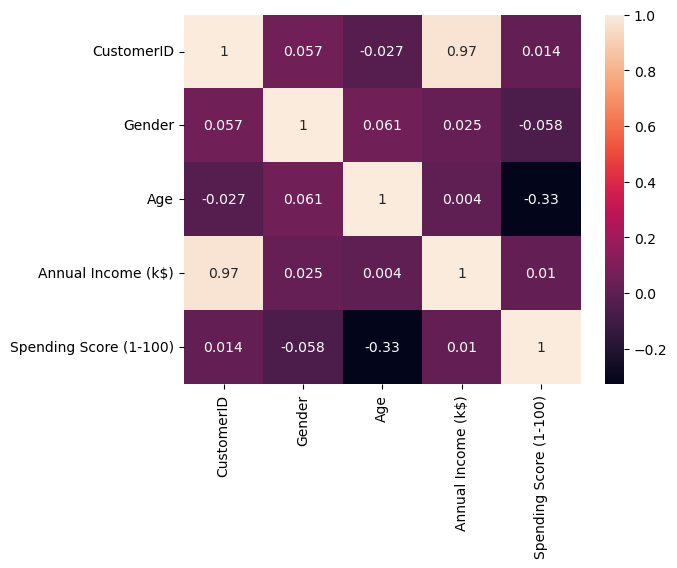

In [19]:
sns.heatmap(df.corr(),annot=True)

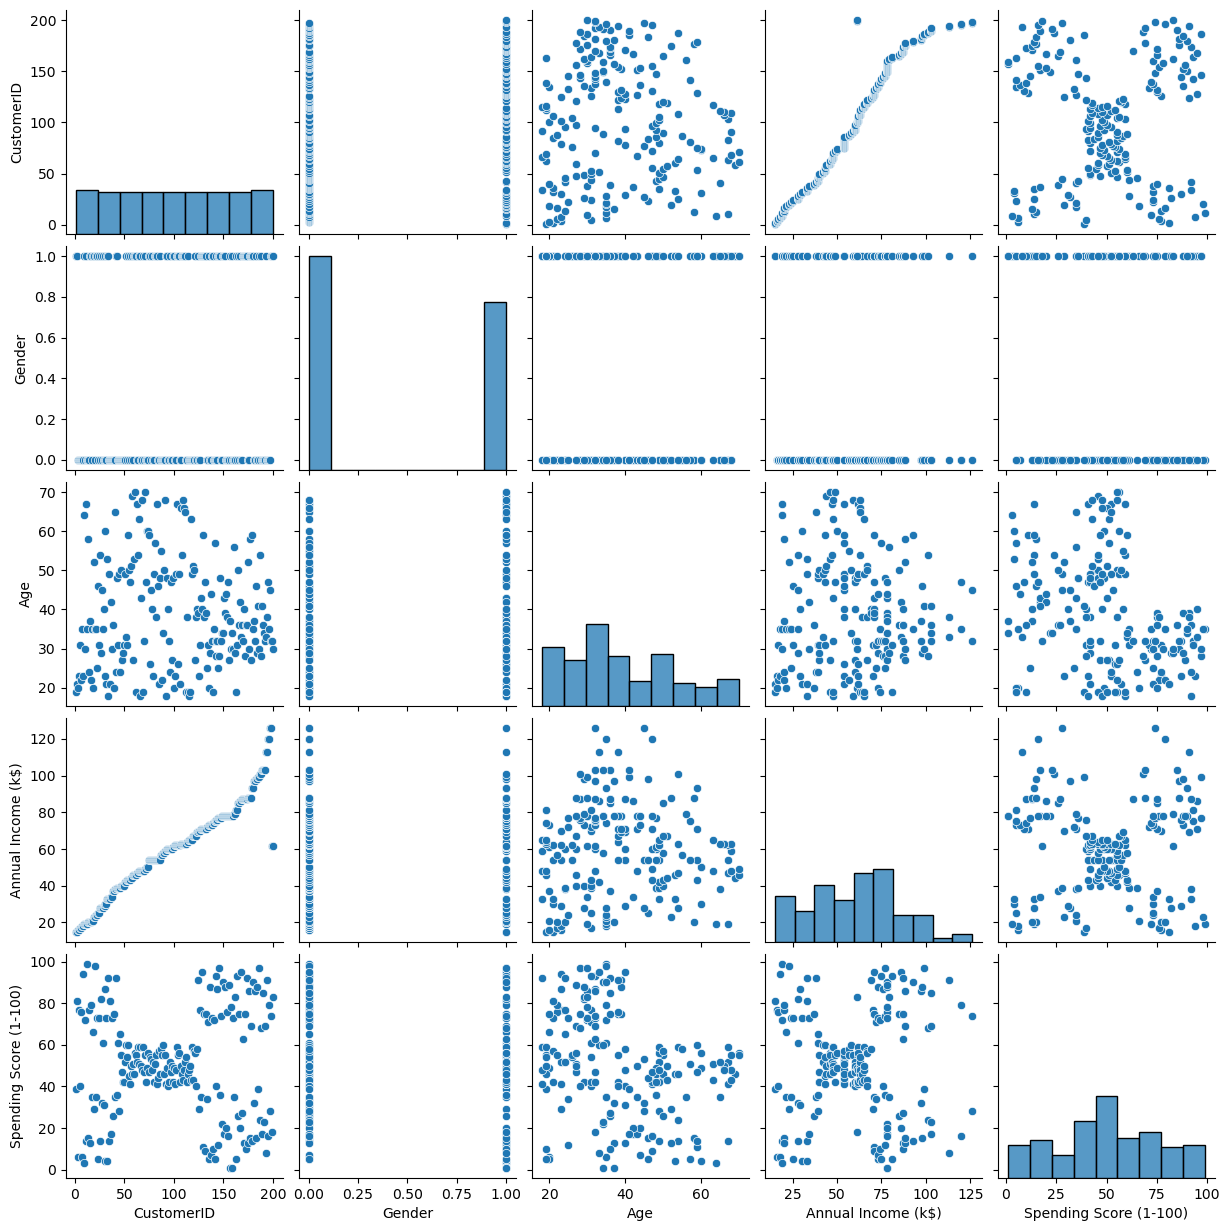

In [20]:
sns.pairplot(df)

## Data Scaling


In [21]:
from sklearn.preprocessing import StandardScaler

x = df.copy()
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [22]:
x1=pd.DataFrame(x_scaled)
x1.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980


## Initiating PCA to reduce dimentions


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_scaled)
PCA_ds = pd.DataFrame(pca.transform(x_scaled), columns=(["col1","col2","col3"]))
PCA_ds.describe()

,col1,col2,col3
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,7.105427e-17,-6.661338e-17,9.325873e-17
std,1.408800e+00,1.163758e+00,9.906587e-01
min,-2.484859e+00,-2.192097e+00,-1.425478e+00
25%,-1.180446e+00,-9.944752e-01,-8.887870e-01
50%,4.890649e-02,8.105412e-03,-5.127897e-01
75%,1.104238e+00,1.059576e+00,9.685679e-01
max,3.149170e+00,2.733202e+00,1.709541e+00


## Finding the K value for KNN

In [24]:
from sklearn import cluster

In [25]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(PCA_ds)
  error.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [26]:
error

[859.7704657335983,
 576.1842113477096,
 452.9232122455488,
 355.8167382231425,
 293.20920481602855,
 230.8245559837705,
 194.0495839463337,
 161.45503044267448,
 137.58167140867832,
 122.89712472942567]

## making of elbow chart

In [27]:
import matplotlib.pyplot as plt


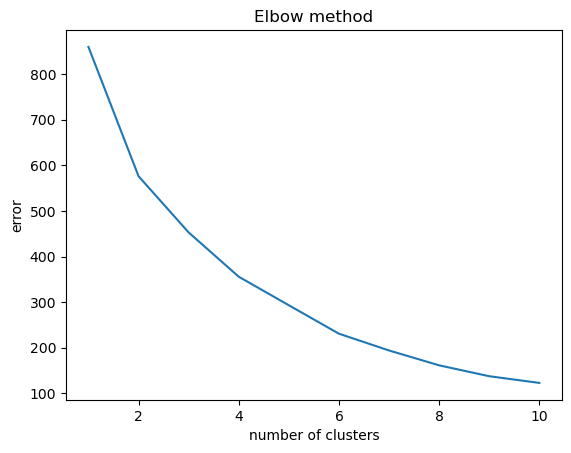

In [28]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


## From this Graph We can Take the Value of K = 5

In [29]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [30]:
km_model.fit(PCA_ds)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [31]:
pred = km_model.predict(PCA_ds)
pred

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 4, 4, 3, 3, 2, 4, 2, 4, 2, 3, 2, 2, 3, 4, 4, 2, 3,
       4, 4, 3, 4, 2, 4, 4, 4, 2, 1, 4, 2, 3, 4, 2, 2, 2, 4, 3, 2, 4, 0,
       0, 4, 4, 1, 2, 4, 0, 1, 4, 0, 2, 1, 0, 4, 2, 1, 2, 0, 4, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1])

In [32]:
km_model.predict([[1,40,35]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [33]:
km_model.predict([[0,15,100]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])